# 泰坦尼克号生存状况探索

In [1]:
#   导入语句
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#参数设置
sns.set_style('darkgrid')
pd.options.display.max_columns = 30
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.mode.chained_assignment = None
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False

## 数据整理

### 数据概览

In [3]:
#加载数据集
df_train = pd.read_csv("train.csv")
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S


In [4]:
df_test = pd.read_csv("test.csv")
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.82920,NaN,Q


In [5]:
#查看数据信息
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
#查看重复值
df_train.duplicated().sum()

0

In [8]:
df_test.duplicated().sum()

0

In [9]:
#查看缺失值
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 数据清理

In [11]:
#将数据集合并进行清理
df = df_train.append(df_test,ignore_index = True,sort =False)
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.00000,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.00000,891.00000,1309.00000,1046.00000,1309.00000,1309.00000,1308.00000
mean,655.00000,0.38384,2.29488,29.88114,0.49885,0.38503,33.29548
std,378.02006,0.48659,0.83784,14.41349,1.04166,0.86556,51.75867
min,1.00000,0.00000,1.00000,0.17000,0.00000,0.00000,0.00000
25%,328.00000,0.00000,2.00000,21.00000,0.00000,0.00000,7.89580
50%,655.00000,0.00000,3.00000,28.00000,0.00000,0.00000,14.45420
75%,982.00000,1.00000,3.00000,39.00000,1.00000,0.00000,31.27500
max,1309.00000,1.00000,3.00000,80.00000,8.00000,9.00000,512.32920


In [13]:
#用众数填充港口
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,nan,3,"Storey, Mr. Thomas",male,60.50000,0,0,3701,nan,NaN,S


In [15]:
df['Fare'] = df['Fare'].fillna(df.groupby(['Pclass','Embarked'])['Fare'].mean()[3,'S'])

In [16]:
df['Cabin'] = df['Cabin'].fillna('Missing')

In [17]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

>由于年龄缺失较多，且会影响生存率的判断，所以在拆分出多个数值型的变量后再构建模型填充缺失值。

In [18]:
#拆分性别
df = df.join(pd.get_dummies(df['Sex']))

In [19]:
#拆分港口
df = df.join(pd.get_dummies(df['Embarked'],prefix = 'Embarked'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.00000,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,Missing,S,0,1,0,0,1
1,2,1.00000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C,1,0,1,0,0
2,3,1.00000,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,Missing,S,1,0,0,0,1
3,4,1.00000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S,1,0,0,0,1
4,5,0.00000,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,Missing,S,0,1,0,0,1


In [20]:
#在姓名中，我们可以发现每个人有不同的称号，将称谓信息从中拆分出来
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.',expand = False)
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Jonkheer      1
Countess      1
Mme           1
Capt          1
Lady          1
Sir           1
Dona          1
Don           1
Name: Title, dtype: int64

In [21]:
#将姓名做出统一化处理
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
df['Title'] = df['Title'].map(title_Dict)
df['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

In [22]:
df['Title_num'] = pd.factorize(df['Title'])[0]

In [23]:
df.corr()['Age']

PassengerId    0.02881
Survived      -0.07722
Pclass        -0.40811
Age            1.00000
SibSp         -0.24370
Parch         -0.15092
Fare           0.17753
female        -0.06364
male           0.06364
Embarked_C     0.08578
Embarked_Q    -0.01946
Embarked_S    -0.07000
Title_num     -0.23326
Name: Age, dtype: float64

In [24]:
age = df[['Age','Pclass','SibSp','Parch','Fare','female','Embarked_C','Embarked_Q','Title_num']]
age_not_null = age[age['Age'].notnull()]
age_is_null = age[age['Age'].isnull()]
X_features = age_not_null.values[:,1:]
X_labels = age_not_null.values[:,0]
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100,min_samples_split=20,min_samples_leaf =3,random_state=0)
clf.fit(X_features,X_labels)
scores = cross_val_score(clf,X_features,X_labels,cv=10)
scores.mean()

0.4215089803684761

In [25]:
df.loc[df['Age'].isnull(),['Age']] = clf.predict(age_is_null.values[:,1:])

In [26]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
female           0
male             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Title            0
Title_num        0
dtype: int64

In [27]:
#拆分数据
train = df[df['Survived'].notnull()].copy()
test = df[df['Survived'].isnull()].copy()

In [28]:
train.shape,test.shape

((891, 19), (418, 19))

## 数据探索

In [29]:
train.corr()['Survived']

PassengerId   -0.00501
Survived       1.00000
Pclass        -0.33848
Age           -0.07156
SibSp         -0.03532
Parch          0.08163
Fare           0.25731
female         0.54335
male          -0.54335
Embarked_C     0.16824
Embarked_Q     0.00365
Embarked_S    -0.14968
Title_num      0.37881
Name: Survived, dtype: float64

In [30]:
train.corr()['female']

PassengerId   -0.04294
Survived       0.54335
Pclass        -0.13190
Age           -0.12449
SibSp          0.11463
Parch          0.24549
Fare           0.18233
female         1.00000
male          -1.00000
Embarked_C     0.08285
Embarked_Q     0.07412
Embarked_S    -0.11922
Title_num      0.52114
Name: female, dtype: float64

>影响比较大的是船舱、性别、称呼。但是称呼里和性别的存活率关联还比较大，VIF会影响之后模型的构建。

### 船舱与是否存活之间的关系

Text(0, 0.5, '存活率')

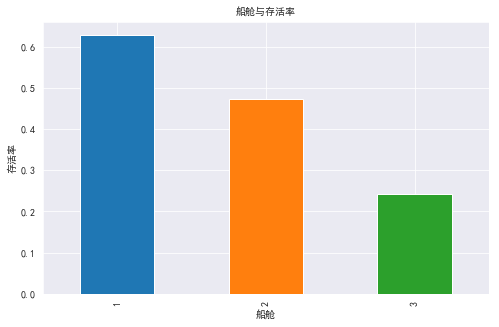

In [31]:
fig,axes = plt.subplots(1,1,figsize=(8,5))
train.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('船舱与存活率',fontsize = 10)
plt.xlabel('船舱',fontsize = 10)
plt.ylabel('存活率',fontsize = 10)

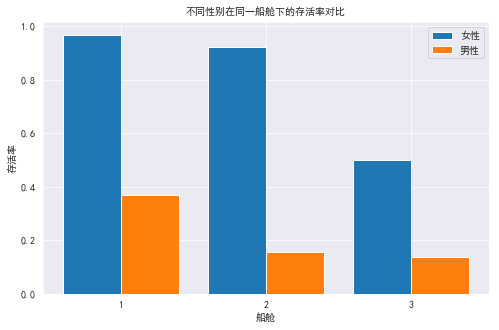

In [32]:
pclass_sex_corr = train.groupby(['Pclass','Sex'])['Survived'].mean().reset_index(name='Rate')

fig,axes=plt.subplots(1,1,figsize=(8,5))
total_width, n,size = 0.8, 2,3
width = total_width / n
x = np.arange(size) - (total_width - width) / 2
a = pclass_sex_corr[pclass_sex_corr['Sex'] == 'female']['Rate'].values
b = pclass_sex_corr[pclass_sex_corr['Sex'] == 'male']['Rate'].values
plt.bar(x,a,width=width, label='女性')
plt.bar(x + width, b, width=width, label='男性')
plt.xticks(x + width/2,[1,2,3])
plt.legend()
plt.title('不同性别在同一船舱下的存活率对比',fontsize = 10)
plt.xlabel('船舱',fontsize = 10)
plt.ylabel('存活率',fontsize = 10)
plt.show()

>船舱和性别都会影响存活率，下面来看整体的性别的影响。

## 性别与存活率

Text(0, 0.5, '存活率')

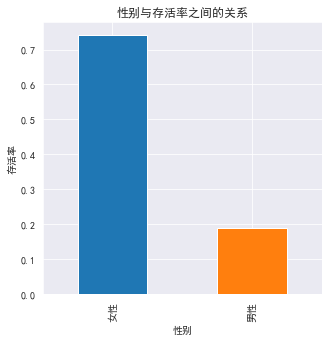

In [33]:
fig,axes = plt.subplots(1,1,figsize=(5,5)) 
train.groupby('male')['Survived'].mean().plot(ax=axes,title = '性别与存活率之间的关系',kind='bar')
plt.xticks([0,1],['女性','男性'])
plt.xlabel('性别')
plt.ylabel('存活率')

>女性的存活率明显大于男性

## 姓名中的称呼和存活率之间的关系

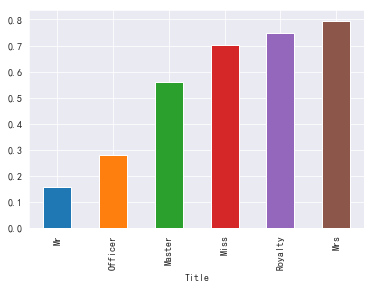

In [34]:
train.groupby('Title')['Survived'].mean().sort_values(ascending=True).plot.bar()

>可以看到不同类型的人的存活率也有差别。

## 年龄与存活率的关系

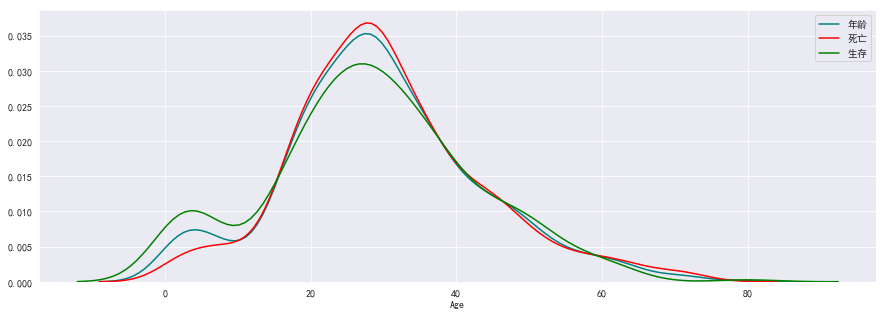

In [35]:
fig,axes=plt.subplots(1,1,figsize=(15,5))
sns.distplot(train['Age'],color='Teal',hist=False,label='年龄',ax=axes)
sns.distplot(train[train['Survived']==0]['Age'],color='r',hist=False,label='死亡',ax=axes)
sns.distplot(train[train['Survived']==1]['Age'],color='g',hist=False,label='生存',ax=axes)
plt.xlim =(0,train['Age'].max())

> 年纪小的存活率似乎高一些，年纪大的存活率似乎低一些，现在将年龄分组来查看一下不同年龄层的存活率。

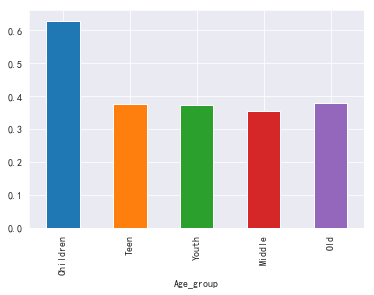

In [36]:
bins = [0,8,14,26,45,100]
bins_name = ['Children','Teen','Youth','Middle','Old']
train['Age_group'] = pd.cut(train['Age'], bins,labels = bins_name)
train.groupby('Age_group')['Survived'].mean().plot(kind='bar')

>可以看出，孩子的存活率比较高，剩下的存活率都比较低。

## 家属与存活的关系

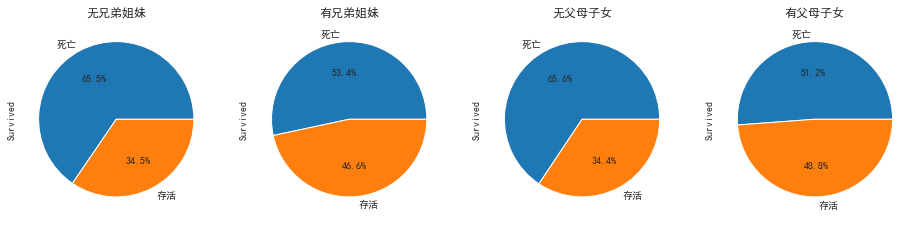

In [37]:
pie_name = ['死亡','存活']
fig,axes = plt.subplots(1,4,figsize=(16,16))
train[train['SibSp'] == 0]['Survived'].value_counts().plot.pie(labels=pie_name,autopct = '%1.1f%%',title= '无兄弟姐妹',ax=axes[0])
train[train['SibSp'] != 0]['Survived'].value_counts().plot.pie(labels=pie_name,autopct = '%1.1f%%',title= '有兄弟姐妹',ax=axes[1])
train[train['Parch'] == 0]['Survived'].value_counts().plot.pie(labels=pie_name,autopct = '%1.1f%%',title= '无父母子女',ax=axes[2])
train[train['Parch'] != 0]['Survived'].value_counts().plot.pie(labels=pie_name,autopct = '%1.1f%%',title= '有父母子女',ax=axes[3])

>可以看到，是否有亲属还是会影响存活率的。

Text(0.5, 0, '父母子女数量')

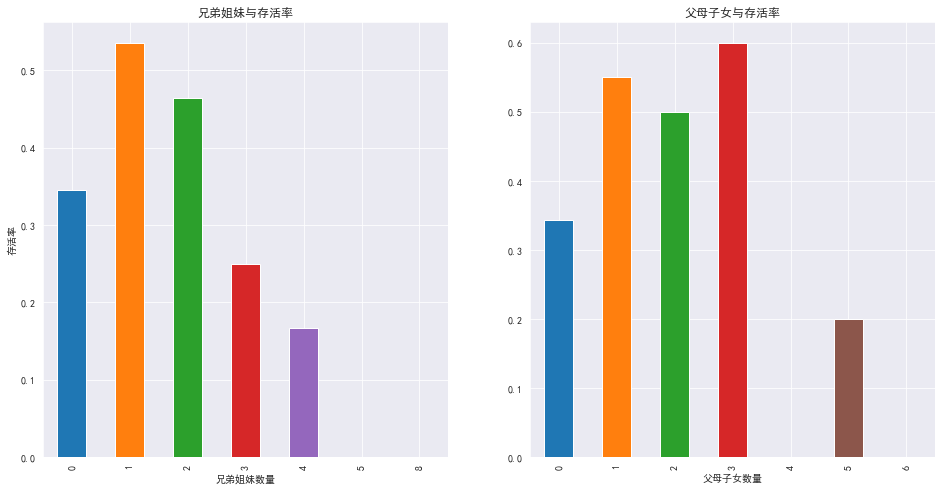

In [38]:
fig,axes = plt.subplots(1,2,figsize=(16,8))
train.groupby('SibSp')['Survived'].mean().plot(kind='bar',title='兄弟姐妹与存活率',ax = axes[0])
axes[0].set_ylabel('存活率')
axes[0].set_xlabel('兄弟姐妹数量')
train.groupby('Parch')['Survived'].mean().plot(kind='bar',title='父母子女与存活率',ax = axes[1])
axes[1].set_xlabel('父母子女数量')

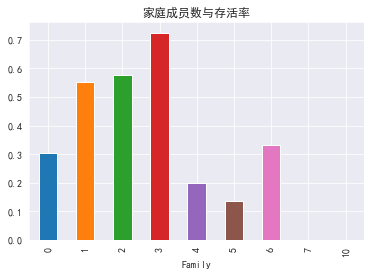

In [39]:
train['Family'] = train['Parch'] + train['SibSp']
train.groupby('Family')['Survived'].mean().plot(kind='bar',title='家庭成员数与存活率')

>家庭成员数量呈双峰型，但整体来看，家庭成员太多或者没有家庭成员太少都会影响存活率。

## 票价与存活之间的关系

In [40]:
df['Fare'].describe()

count   1309.00000
mean      33.28107
std       51.74150
min        0.00000
25%        7.89580
50%       14.45420
75%       31.27500
max      512.32920
Name: Fare, dtype: float64

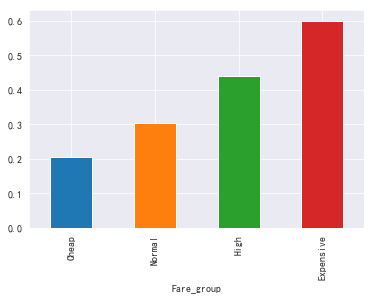

In [41]:
bins = [0,7.89580,14.45420,31.27500,512.32920]
bins_name = ['Cheap','Normal','High','Expensive']
train['Fare_group'] = pd.cut(train['Fare'], bins,labels = bins_name)
train.groupby('Fare_group')['Survived'].mean().plot(kind='bar')

>可以看出，票价越贵更有可能活下来。

## 港口与存活之间的关系

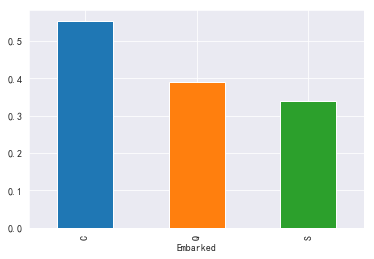

In [42]:
train.groupby('Embarked')['Survived'].mean().plot.bar()

>可以看到不同的港口也会影响存活率。

## 特征工程

>当前已经对性别、港口定性变量进行了虚拟变量处理，称谓列进行了factorizing处理。接下来需要将Bining化的年龄、票价、家族成员进行处理。

In [43]:
train['Age_num'] = pd.factorize(train['Age_group'])[0]

In [44]:
train['Fare_num'] = pd.factorize(train['Fare_group'])[0]

In [45]:
bins = [0,1,4,10]
bins_name = ['Small','Median','Large']
train['Family_group'] = pd.cut(train['Family'],bins,labels=bins_name,include_lowest= True,right=False)
train.groupby('Family_group')['Family'].value_counts()

Family_group  Family
Small         0         537
Median        1         161
              2         102
              3          29
Large         5          22
              4          15
              6          12
              7           6
Name: Family, dtype: int64

In [46]:
train['Family_num'] = pd.factorize(train['Family_group'])[0]

## 处理测试数据

> 当前也需要对测试数据构建年龄、票价、家族成员列。

In [47]:
bins = [0,8,14,26,45,100]
bins_name = ['Children','Teen','Youth','Middle','Old']
test['Age_group'] = pd.cut(test['Age'], bins,labels = bins_name)
test['Age_num'] = pd.factorize(test['Age_group'])[0]

In [48]:
bins = [0,7.89580,14.45420,31.27500,512.32920]
bins_name = ['Cheap','Normal','High','Expensive']
test['Fare_group'] = pd.cut(test['Fare'], bins,labels = bins_name)
test['Fare_num'] = pd.factorize(test['Fare_group'])[0]

In [49]:
bins = [0,1,4,10]
bins_name = ['Small','Median','Large']
test['Family'] = test['Parch'] + test['SibSp']
test['Family_group'] = pd.cut(test['Family'],bins,labels=bins_name,include_lowest= True,right=False)
test['Family_num'] = pd.factorize(test['Family_group'])[0]

In [50]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Embarked_C,Embarked_Q,Embarked_S,Title,Title_num,Age_group,Age_num,Fare_group,Fare_num,Family,Family_group,Family_num
891,892,nan,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.82920,Missing,Q,0,1,0,1,0,Mr,0,Middle,0,Cheap,0,0,Small,0
892,893,nan,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.00000,Missing,S,1,0,0,0,1,Mrs,1,Old,1,Cheap,0,1,Median,1
893,894,nan,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.68750,Missing,Q,0,1,0,1,0,Mr,0,Old,1,Normal,1,0,Small,0
894,895,nan,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.66250,Missing,S,0,1,0,0,1,Mr,0,Middle,0,Normal,1,0,Small,0
895,896,nan,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.28750,Missing,S,1,0,0,0,1,Mrs,1,Youth,2,Normal,1,2,Median,1


## 查看特征之间相关性

In [51]:
corr_df = train[['Pclass','female','male','Embarked_C','Embarked_Q','Embarked_S','Title_num','Age_num','Fare_num','Family_num','Survived']]

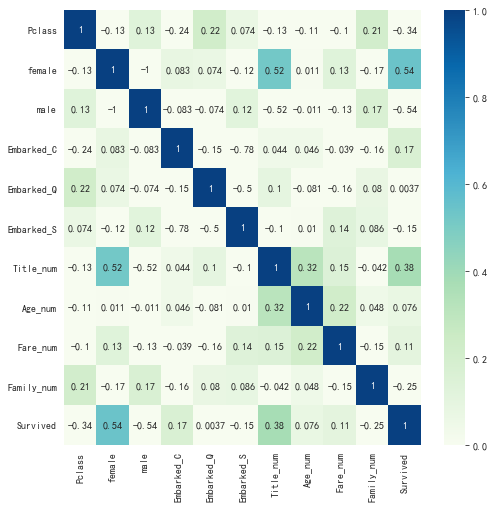

In [52]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_df.corr(),vmin=0,vmax=1,cmap= 'GnBu',annot=True)

## 构建模型

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
def get_top_n_features(X, Y, top_n_features):

    # random forest
    rf_est = RandomForestClassifier(random_state=0)
    rf_param_grid = {'n_estimators': [500], 'min_samples_split': [2, 3], 'max_depth': [20]}
    rf_grid = GridSearchCV(rf_est, rf_param_grid, n_jobs=25, cv=10, verbose=1)
    rf_grid.fit(X,Y)
    print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
    print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
    print('Top N Features RF Train Score:' + str(rf_grid.score(X, Y)))
    feature_imp_sorted_rf = pd.DataFrame({'feature': list(X),
                                          'importance': rf_grid.best_estimator_.feature_importances_}).\
    sort_values('importance', ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 10 Features from RF Classifier')
    print(str(features_top_n_rf[:10]))

    # AdaBoost
    ada_est =AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators': [500], 'learning_rate': [0.01, 0.1]}
    ada_grid = GridSearchCV(ada_est, ada_param_grid, n_jobs=25, cv=10, verbose=1)
    ada_grid.fit(X, Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(X, Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature': list(X),
                                           'importance': ada_grid.best_estimator_.feature_importances_})\
    .sort_values('importance', ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Feature from Ada Classifier:')
    print(str(features_top_n_ada[:10]))

    # ExtraTree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators': [500], 'min_samples_split': [3, 4], 'max_depth': [20]}
    et_grid = GridSearchCV(et_est, et_param_grid, n_jobs=25, cv=10, verbose=1)
    et_grid.fit(X, Y)
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best ET Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(X, Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature': list(X),
                                          'importance': et_grid.best_estimator_.feature_importances_})\
    .sort_values('importance', ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))
    
    # GradientBoosting
    gb_est =GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators': [500], 'learning_rate': [0.01, 0.1], 'max_depth': [20]}
    gb_grid = GridSearchCV(gb_est, gb_param_grid, n_jobs=25, cv=10, verbose=1)
    gb_grid.fit(X, Y)
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(X, Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature': list(X),
                                           'importance': gb_grid.best_estimator_.feature_importances_})\
    .sort_values('importance', ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))
    
    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split': [2, 4], 'max_depth': [20]}
    dt_grid = GridSearchCV(dt_est, dt_param_grid, n_jobs=25, cv=10, verbose=1)
    dt_grid.fit(X, Y)
    print('Top N Features Best DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(X, Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature': list(X),
                                          'importance': dt_grid.best_estimator_.feature_importances_})\
    .sort_values('importance', ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    
    # merge the three models
    features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et, features_top_n_gb, features_top_n_dt], 
                               ignore_index=True).drop_duplicates()
    
    features_importance = pd.concat([feature_imp_sorted_rf, feature_imp_sorted_ada, feature_imp_sorted_et, 
                                   feature_imp_sorted_gb, feature_imp_sorted_dt],ignore_index=True)
    
    return features_top_n , features_importance

In [54]:
X_train = corr_df.drop(['Survived'],axis=1)
y_train = corr_df['Survived']
X_test = test.drop(['Survived'],axis=1)

In [55]:
feature_to_pick = 30
feature_top_n, feature_importance = get_top_n_features(X_train, y_train, feature_to_pick)
titanic_train_data_X = pd.DataFrame(X_train[feature_top_n])
titanic_test_data_X = pd.DataFrame(X_test[feature_top_n])

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   14.8s remaining:    7.9s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   15.1s finished


Top N Features Best RF Params:{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 500}
Top N Features Best RF Score:0.8249158249158249
Top N Features RF Train Score:0.8787878787878788
Sample 10 Features from RF Classifier
6     Title_num
1        female
0        Pclass
2          male
7       Age_num
9    Family_num
8      Fare_num
3    Embarked_C
5    Embarked_S
4    Embarked_Q
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    6.6s remaining:    3.5s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    7.0s finished


Top N Features Best Ada Params:{'learning_rate': 0.1, 'n_estimators': 500}
Top N Features Best Ada Score:0.8215488215488216
Top N Features Ada Train Score:0.8305274971941639
Sample 10 Feature from Ada Classifier:
6     Title_num
8      Fare_num
7       Age_num
9    Family_num
0        Pclass
5    Embarked_S
2          male
3    Embarked_C
1        female
4    Embarked_Q
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    3.7s remaining:    1.9s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    3.7s finished


Top N Features Best ET Params:{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 500}
Top N Features Best ET Score:0.8260381593714927
Top N Features ET Train Score:0.8810325476992144
Sample 10 Features from ET Classifier:
1        female
2          male
0        Pclass
6     Title_num
7       Age_num
9    Family_num
8      Fare_num
3    Embarked_C
5    Embarked_S
4    Embarked_Q
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   15.4s remaining:    8.2s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   15.5s finished


Top N Features Best GB Params:{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500}
Top N Features Best GB Score:0.8114478114478114
Top N Features GB Train Score:0.8821548821548821
Sample 10 Feature from GB Classifier:
6     Title_num
0        Pclass
9    Family_num
7       Age_num
8      Fare_num
5    Embarked_S
3    Embarked_C
1        female
4    Embarked_Q
2          male
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Top N Features Best DT Params:{'max_depth': 20, 'min_samples_split': 4}
Top N Features Best DT Score:0.8148148148148148
Top N Features DT Train Score:0.877665544332211
Sample 10 Features from DT Classifier:
6     Title_num
0        Pclass
9    Family_num
7       Age_num
8      Fare_num
5    Embarked_S
3    Embarked_C
2          male
1        female
4    Embarked_Q
Name: feature, dtype: object


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    0.0s finished


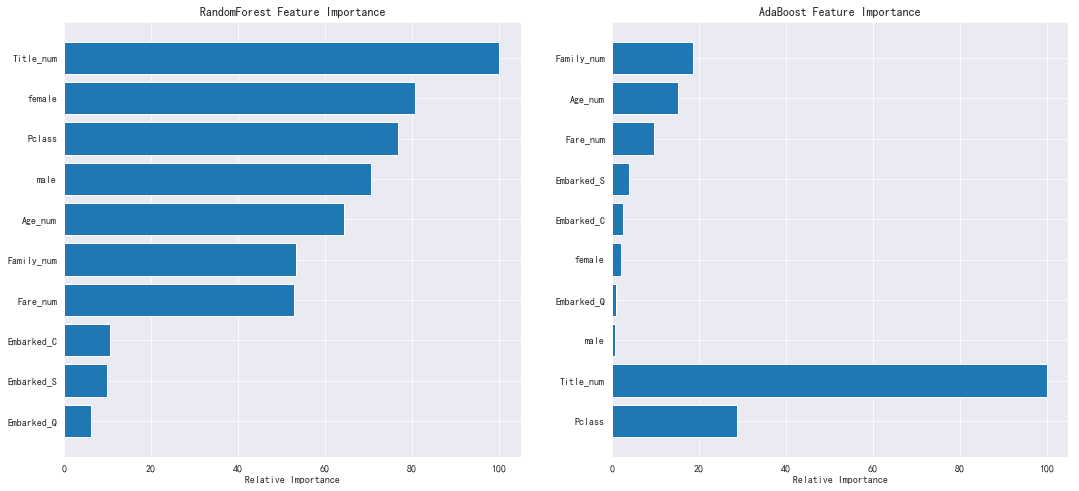

In [56]:
rf_feature_imp = feature_importance[:10]
Ada_feature_imp = feature_importance[32:32+10].reset_index(drop=True)

# make importances relative to max importance
rf_feature_importance = 100.0 * (rf_feature_imp['importance'] / rf_feature_imp['importance'].max())
Ada_feature_importance = 100.0 * (Ada_feature_imp['importance'] / Ada_feature_imp['importance'].max())

# Get the indexes of all features over the importance threshold
rf_important_idx = np.where(rf_feature_importance)[0]
Ada_important_idx = np.where(Ada_feature_importance)[0]

# Adapted from Gradient Boosting regression
pos = np.arange(rf_important_idx.shape[0]) + .5

plt.figure(1, figsize = (18, 8))

plt.subplot(121)
plt.barh(pos, rf_feature_importance[rf_important_idx][::-1])
plt.yticks(pos, rf_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('RandomForest Feature Importance')

plt.subplot(122)
plt.barh(pos, Ada_feature_importance[Ada_important_idx][::-1])
plt.yticks(pos, Ada_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('AdaBoost Feature Importance')

plt.show()

In [57]:
from sklearn import ensemble
rf_est = ensemble.RandomForestClassifier(n_estimators = 750, criterion = 'gini', max_features = 'sqrt',\
                                            max_depth = 3, min_samples_split = 4, min_samples_leaf = 2,\
                                             n_jobs = 50, random_state = 42, verbose = 1)
gbm_est = ensemble.GradientBoostingClassifier(n_estimators=900, learning_rate=0.0008, loss='exponential',\
                                              min_samples_split=3, min_samples_leaf=2, max_features='sqrt',\
                                                  max_depth=3, random_state=42, verbose=1)
et_est = ensemble.ExtraTreesClassifier(n_estimators=750, max_features='sqrt', max_depth=35, n_jobs=50,\
                                           criterion='entropy', random_state=42, verbose=1)
voting_est = ensemble.VotingClassifier(estimators = [('rf', rf_est),('gbm', gbm_est),('et', et_est)],\
                                       voting = 'soft', weights = [3,5,2],\
                                       n_jobs = 50)
voting_est.fit(titanic_train_data_X,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weigh...timators=750, n_jobs=50,
           oob_score=False, random_state=42, verbose=1, warm_start=False))],
         flatten_transform=None, n_jobs=50, voting='soft',
         weights=[3, 5, 2])

In [58]:
test['Survived'] = voting_est.predict(titanic_test_data_X)
submission = test[['PassengerId','Survived']]
submission.to_csv('submission_result.csv',index=False,sep=',')

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.1s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.1s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.1s finished


## 逻辑回归模型

In [59]:
from sklearn.model_selection import train_test_split
X = corr_df.drop(['Survived'],axis=1)
y = corr_df['Survived']
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
log_mod = LogisticRegression()
log_mod.fit(X_train,y_train)
preds = log_mod.predict(X_test)
confusion_matrix(y_test,preds)

C:\Users\tonyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[86, 24],
       [20, 49]], dtype=int64)

In [61]:
accuracy_score(y_test,preds)

0.7541899441340782

In [62]:
pred_test = test[['Pclass','female','male','Embarked_C','Embarked_Q','Embarked_S','Title_num','Age_num','Fare_num','Family_num']]
preds = log_mod.predict(pred_test)

In [63]:
test['Survived'] = preds

In [64]:
test['Survived'] = test['Survived'].astype('int')

In [65]:
result = test[['PassengerId','Survived']]

In [66]:
result.to_csv('test_result.csv')